# Loading The Data

In [7]:
# Read the Data
import pandas as pd
import numpy as np
df= pd.read_csv("/content/gender_classification_v7.csv")
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


# Preprocessing the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [9]:
# Separating categorical and numerical Values
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype== "O":
        cat.append(i)
    else:
        num.append(i)

print("Categorical:", cat)
print("Numerical:", num)

Categorical: ['gender']
Numerical: ['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']


In [10]:
# Identifying unique values in each column
for i in df:
  print(i)
  print("Unique Values:", df[i].unique())
  print("Number of unique:", df[i].nunique())
  print()
  print()

long_hair
Unique Values: [1 0]
Number of unique: 2


forehead_width_cm
Unique Values: [11.8 14.  14.4 13.5 13.  15.3 11.9 12.1 12.5 15.5 14.7 14.5 14.2 15.2
 14.6 12.8 12.9 12.2 12.3 12.7 14.1 11.5 13.8 13.7 12.  11.4 15.4 13.3
 13.2 14.3 13.9 11.7 15.1 15.  12.4 11.6 12.6 14.8 13.1 13.4 13.6 14.9]
Number of unique: 42


forehead_height_cm
Unique Values: [6.1 5.4 6.3 5.9 6.8 6.2 5.2 5.8 6.7 6.5 6.  5.6 7.  6.4 5.3 5.7 5.1 5.5
 7.1 6.6 6.9]
Number of unique: 21


nose_wide
Unique Values: [1 0]
Number of unique: 2


nose_long
Unique Values: [0 1]
Number of unique: 2


lips_thin
Unique Values: [1 0]
Number of unique: 2


distance_nose_to_lip_long
Unique Values: [1 0]
Number of unique: 2


gender
Unique Values: ['Male' 'Female']
Number of unique: 2




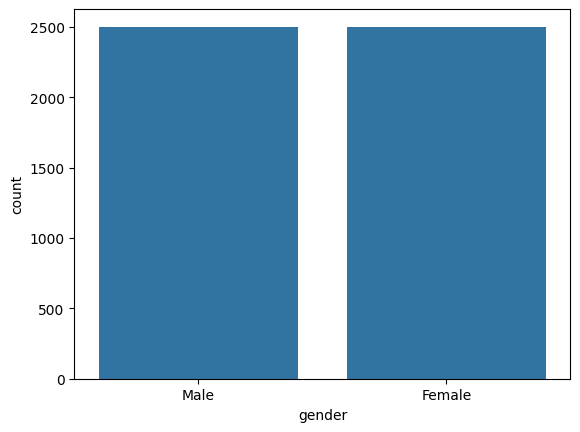

In [11]:
# Checking the balancing of Categorical columns
import matplotlib.pyplot as plt
import seaborn as sns
def cat_analysis(col):
  df[col].value_counts()
  sns.countplot(x=col,data=df)
  plt.show()

for i in cat:
  cat_analysis(i)

Percentage of outliers in long_hair 13.0373925214957


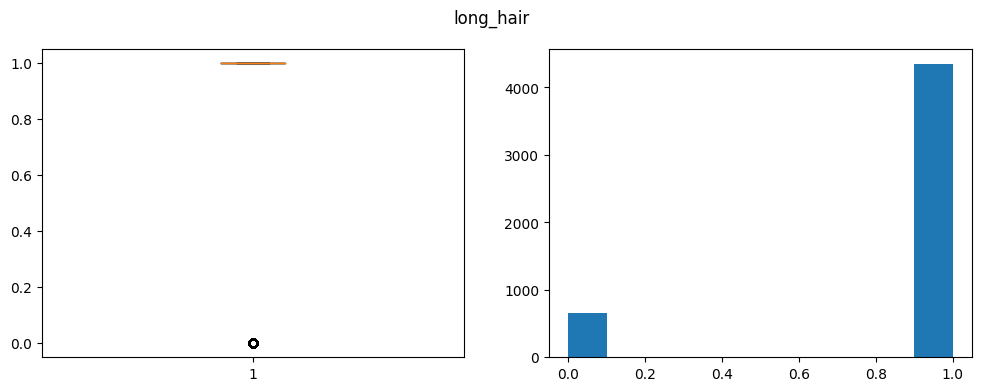

<ipython-input-12-11a8e5cf67ba>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.869626074785043' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col]<lf) | (df[col]>uf), col]= df[col].mean()


None
+++====+++
Percentage of outliers in forehead_width_cm 0.0


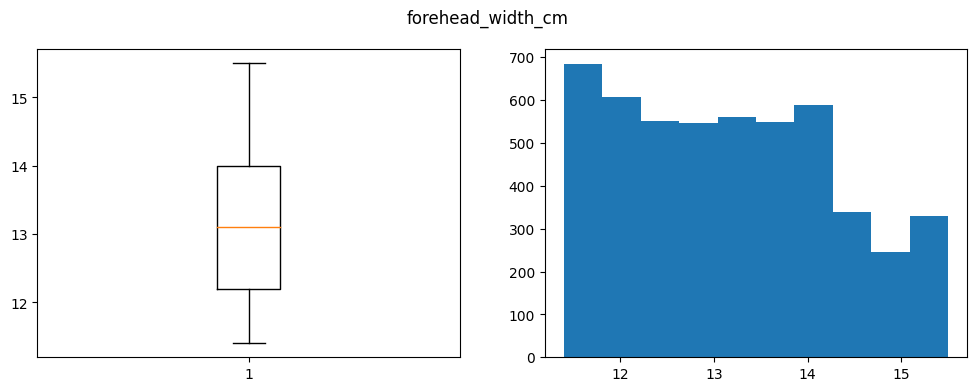

None
+++====+++
Percentage of outliers in forehead_height_cm 0.0


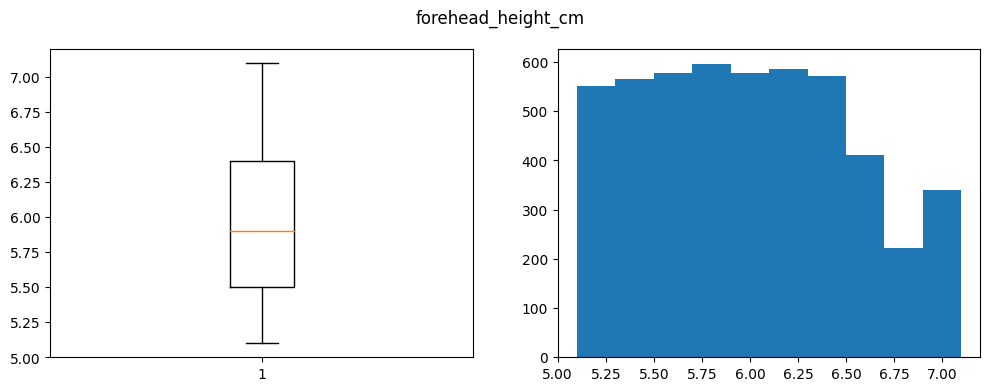

None
+++====+++
Percentage of outliers in nose_wide 0.0


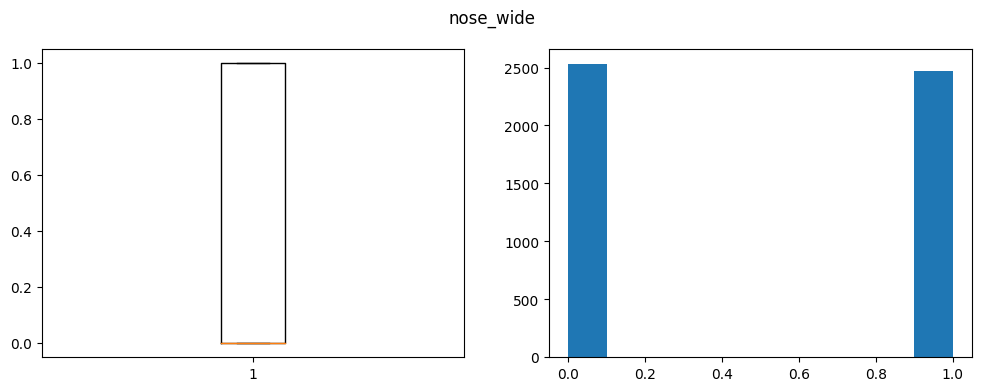

<ipython-input-12-11a8e5cf67ba>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.4939012197560488' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col]<lf) | (df[col]>uf), col]= df[col].mean()


None
+++====+++
Percentage of outliers in nose_long 0.0


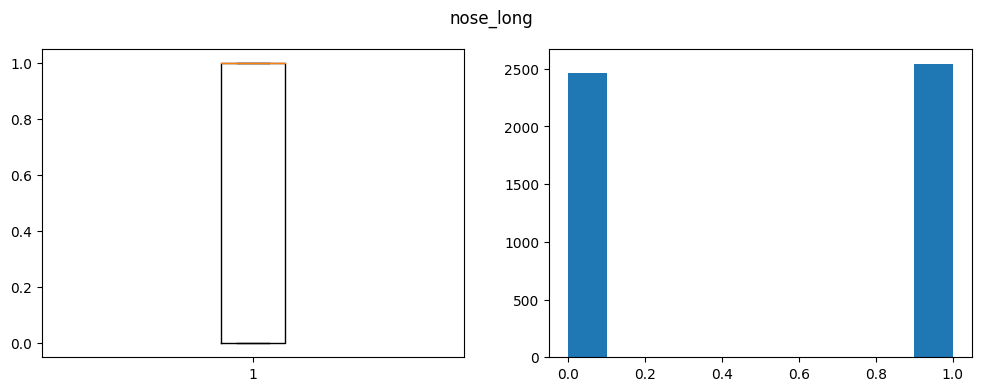

<ipython-input-12-11a8e5cf67ba>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5078984203159368' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col]<lf) | (df[col]>uf), col]= df[col].mean()


None
+++====+++
Percentage of outliers in lips_thin 0.0


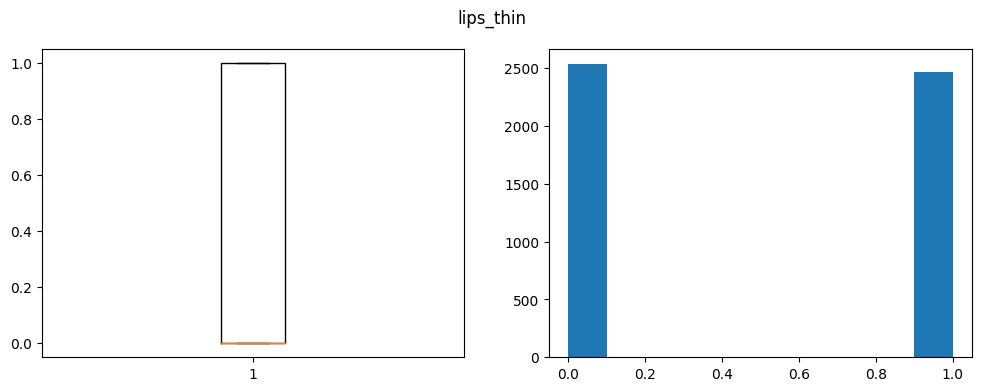

<ipython-input-12-11a8e5cf67ba>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.4931013797240552' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col]<lf) | (df[col]>uf), col]= df[col].mean()


None
+++====+++
Percentage of outliers in distance_nose_to_lip_long 0.0


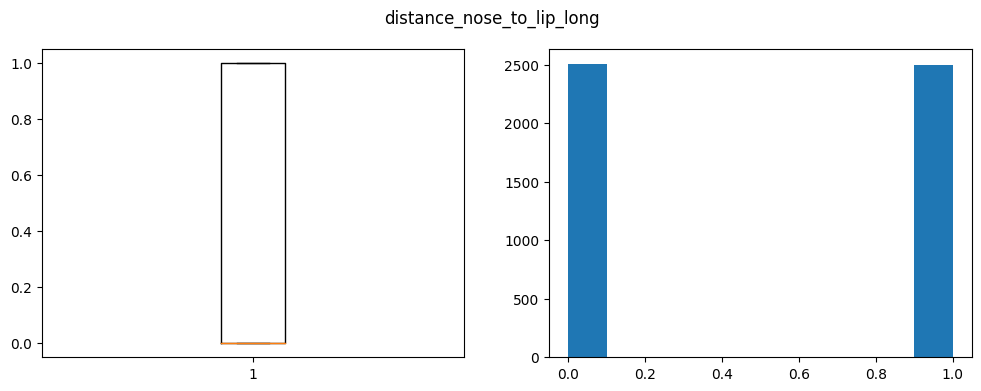

None
+++====+++


<ipython-input-12-11a8e5cf67ba>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.4989002199560088' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col]<lf) | (df[col]>uf), col]= df[col].mean()


In [12]:
# Treating the outliers of numerical columns
def outlier_detection_treatment(col):
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3-q1
    lf= q1- 1.5*iqr
    uf= q3+ 1.5*iqr
    outliers= df[(df[col]<lf) | (df[col]>uf)]
    print("Percentage of outliers in", col ,outliers.shape[0]*100/df.shape[0])
    fig, ax= plt.subplots(1,2, figsize=(12,4))
    ax[0].boxplot(df[col])
    ax[1].hist(df[col])
    plt.suptitle(col)
    plt.show()
    df.loc[(df[col]<lf) | (df[col]>uf), col]= df[col].mean()
for col in num:
    print(outlier_detection_treatment(col))
    print("+++====+++")

In [13]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.000000,11.8,6.1,1.0,0.0,1.0,1.0,Male
1,0.869626,14.0,5.4,0.0,0.0,1.0,0.0,Female
2,0.869626,11.8,6.3,1.0,1.0,1.0,1.0,Male
3,0.869626,14.4,6.1,0.0,1.0,1.0,1.0,Male
4,1.000000,13.5,5.9,0.0,0.0,0.0,0.0,Female
...,...,...,...,...,...,...,...,...
4996,1.000000,13.6,5.1,0.0,0.0,0.0,0.0,Female
4997,1.000000,11.9,5.4,0.0,0.0,0.0,0.0,Female
4998,1.000000,12.9,5.7,0.0,0.0,0.0,0.0,Female
4999,1.000000,13.2,6.2,0.0,0.0,0.0,0.0,Female


In [14]:
# Checking the correlation of data
df.loc[:, num].corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000


<Axes: >

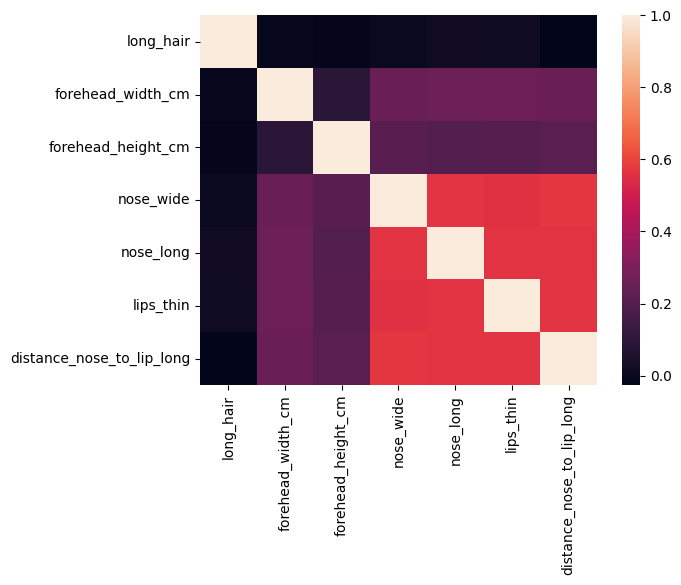

In [15]:
import seaborn as sns
sns.heatmap(df.loc[:, num].corr())

# Encoding the Categorical features

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.000000,11.8,6.1,1.0,0.0,1.0,1.0,1
1,0.869626,14.0,5.4,0.0,0.0,1.0,0.0,0
2,0.869626,11.8,6.3,1.0,1.0,1.0,1.0,1
3,0.869626,14.4,6.1,0.0,1.0,1.0,1.0,1
4,1.000000,13.5,5.9,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
4996,1.000000,13.6,5.1,0.0,0.0,0.0,0.0,0
4997,1.000000,11.9,5.4,0.0,0.0,0.0,0.0,0
4998,1.000000,12.9,5.7,0.0,0.0,0.0,0.0,0
4999,1.000000,13.2,6.2,0.0,0.0,0.0,0.0,0


# Splitting the Independent and Dependent Variables

In [18]:
X = df.drop(['gender'], axis= 1)
y=df['gender']

In [19]:
print(X.shape)
print(y.shape)

(5001, 7)
(5001,)


In [20]:
X = X.values
y = y.values

# Segmenting Training and Testing Data

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 7)
(1001, 7)
(4000,)
(1001,)


# Applying Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300],  # Maximum number of iterations taken for the solvers to converge
    'l1_ratio': [0, 0.5, 1]  # Used only when penalty is 'elasticnet'
}

from sklearn.model_selection import GridSearchCV

# Initialize the LogisticRegression model
log_reg = LogisticRegression(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters from the GridSearchCV
best_params = grid_search.best_params_

# Display the best parameters
print("Best parameters found: ", best_params)

# Get the best score
best_score = grid_search.best_score_
print("Best cross-validation score: ", best_score)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'C': 10, 'l1_ratio': 0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score:  0.96925


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
450 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File 

In [39]:
# Initialize the LogisticRegression with the best parameters
best_log_reg = LogisticRegression(**best_params, random_state=42)

# Fit the model on the entire training data
best_log_reg.fit(x_train, y_train)

# Predict on the train and test data
y_pred_train_lr = best_log_reg.predict(x_train)
y_pred_test_lr = best_log_reg.predict(x_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train_lr)
test_accuracy = accuracy_score(y_test, y_pred_test_lr)
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_lr)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_test_lr)
print("Classification Report:\n", class_report)


Train Accuracy:  0.971
Test Accuracy:  0.964035964035964
Confusion Matrix:
 [[502  16]
 [ 20 463]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       518
           1       0.97      0.96      0.96       483

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


# Applying Support Vector Classifier(SVC) Model

In [40]:
from sklearn.svm import SVC
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],  # Specifies the kernel type to be used in the algorithm
    'degree': [2, 3, 4],  # Degree of the polynomial kernel function ('poly')
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'coef0': [0.0, 0.1, 0.5],  # Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'
}

# Initialize the SVC model
svc = SVC(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters from the GridSearchCV
best_params = grid_search.best_params_

# Display the best parameters
print("Best parameters found: ", best_params)

# Get the best score
best_score = grid_search.best_score_
print("Best cross-validation score: ", best_score)

# Initialize the SVC with the best parameters
best_svc = SVC(**best_params, random_state=42)

# Fit the model on the entire training data
best_svc.fit(x_train, y_train)

# Predict on the test data
y_pred_train_svc = best_svc.predict(x_train)
y_pred_test_svc = best_svc.predict(x_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train_svc)
test_accuracy = accuracy_score(y_test, y_pred_test_svc)
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_svc)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_test_svc)
print("Classification Report:\n", class_report)


Best parameters found:  {'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score:  0.9752500000000002
Train Accuracy:  0.97775
Test Accuracy:  0.965034965034965
Confusion Matrix:
 [[505  13]
 [ 22 461]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       518
           1       0.97      0.95      0.96       483

    accuracy                           0.97      1001
   macro avg       0.97      0.96      0.96      1001
weighted avg       0.97      0.97      0.97      1001



# Applying Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Function to measure the quality of a split
    'splitter': ['best', 'random'],  # Strategy used to choose the split at each node
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'class_weight': [None, 'balanced'],  # Weights associated with classes
}

# Initialize the DecisionTreeClassifier model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters from the GridSearchCV
best_params = grid_search.best_params_

# Display the best parameters
print("Best parameters found: ", best_params)

# Get the best score
best_score = grid_search.best_score_
print("Best cross-validation score: ", best_score)

# Initialize the DecisionTreeClassifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)

# Fit the model on the entire training data
best_dt_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred_train_dt = best_dt_classifier.predict(x_train)
y_pred_test_dt = best_dt_classifier.predict(x_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train_dt)
test_accuracy = accuracy_score(y_test, y_pred_test_dt)
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_dt)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_test_dt)
print("Classification Report:\n", class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 12960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

Best parameters found:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Best cross-validation score:  0.9724999999999999
Train Accuracy:  0.98425
Test Accuracy:  0.9630369630369631
Confusion Matrix:
 [[502  16]
 [ 21 462]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       518
           1       0.97      0.96      0.96       483

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [0.96725 0.964   0.9695  ... 0.9595  0.9705  0.95375]
  warnings.warn(


# Applying Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy', 'log_loss'],  # Function to measure the quality of a split
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Weights associated with classes
}

# Initialize the RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters from the GridSearchCV
best_params = grid_search.best_params_

# Display the best parameters
print("Best parameters found: ", best_params)

# Get the best score
best_score = grid_search.best_score_
print("Best cross-validation score: ", best_score)

# Initialize the RandomForestClassifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Fit the model on the entire training data
best_rf_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred_train_rf = best_rf_classifier.predict(x_train)
y_pred_test_rf = best_rf_classifier.predict(x_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train_rf)
test_accuracy = accuracy_score(y_test, y_pred_test_rf)
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_rf)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_test_rf)
print("Classification Report:\n", class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2880 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2880 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

Best parameters found:  {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.97475
Train Accuracy:  0.98825
Test Accuracy:  0.9690309690309691
Confusion Matrix:
 [[507  11]
 [ 20 463]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       518
           1       0.98      0.96      0.97       483

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



# Applying Deep Learning Model using Artificial Neural Network(ANN)

In [23]:
# Importing Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [24]:
# Data Preprocessing
scaler=StandardScaler()
X=scaler.fit_transform(X)
Y=to_categorical(y,num_classes=4)

In [25]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=78)

In [26]:
X.shape

(5001, 7)

In [27]:
X_train.shape

(3500, 7)

In [28]:
X_test.shape

(1501, 7)

In [29]:
Y_train.shape

(3500, 4)

In [30]:
Y_test.shape

(1501, 4)

In [31]:
# Model Architecture
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Define the optimizer and compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Add EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Save the best model based on validation accuracy
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=512, validation_split=0.2, verbose=1, callbacks=[checkpoint, early_stopping])


Epoch 1/100
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3909 - loss: 1.3529
Epoch 1: val_accuracy improved from -inf to 0.63286, saving model to best_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.4072 - loss: 1.3348 - val_accuracy: 0.6329 - val_loss: 1.0781
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5819 - loss: 1.0729
Epoch 2: val_accuracy improved from 0.63286 to 0.64429, saving model to best_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5817 - loss: 1.0676 - val_accuracy: 0.6443 - val_loss: 0.8384
Epoch 3/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.6270 - loss: 0.8956
Epoch 3: val_accuracy improved from 0.64429 to 0.75857, saving model to best_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6403 - loss: 0.8461 - val_accuracy: 0.7586 - val_loss: 0.6327
Epoch 4/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7422 - loss: 0.6810
Epoch 4: val_accuracy improved from 0.75857 to 0.91429, 

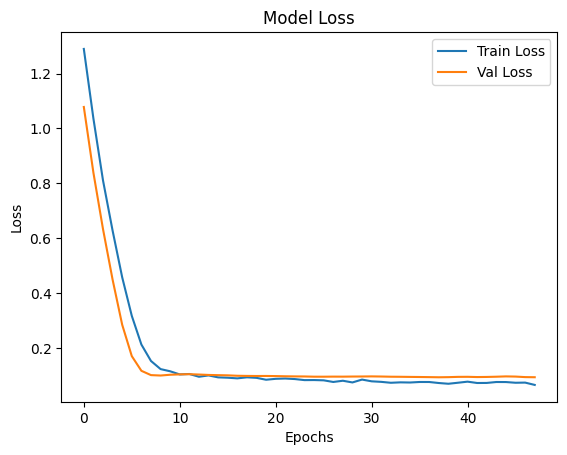

In [34]:
# Checking the Loss of Model
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
# Load the best model
model.load_weights('best_model.keras')

# Predictions
Y_pred_train = model.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train, axis=1)
Y_train = np.argmax(Y_train, axis=1)

Y_pred_test = model.predict(X_test)
Y_pred_test = np.argmax(Y_pred_test, axis=1)
Y_test = np.argmax(Y_test, axis=1)

# Evaluate performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train))
print("Test Accuracy:", accuracy_score(Y_test, Y_pred_test))

print("Confusion Matrix (Test):\n", confusion_matrix(Y_test, Y_pred_test))
print("Classification Report (Test):\n", classification_report(Y_test, Y_pred_test))


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train Accuracy: 0.9754285714285714
Test Accuracy: 0.9680213191205863
Confusion Matrix (Test):
 [[747  13]
 [ 35 706]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       760
           1       0.98      0.95      0.97       741

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



# Comparing Accuracy of all Models

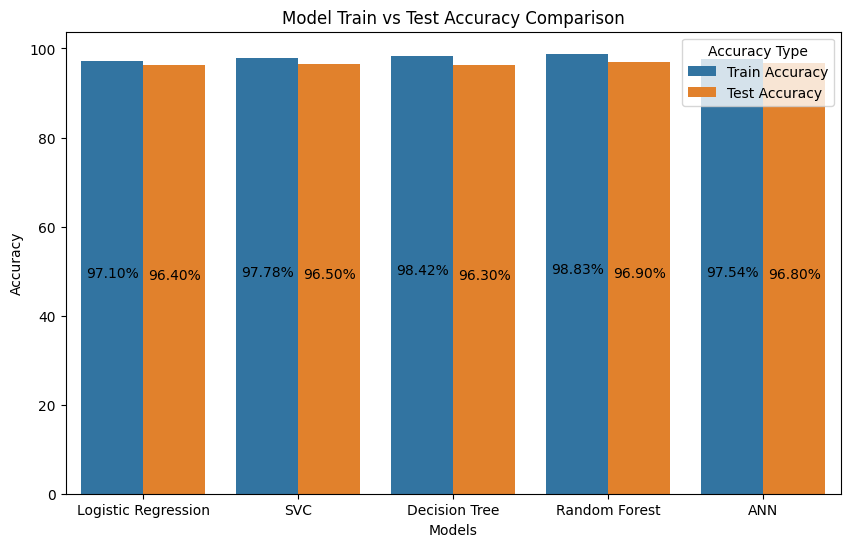

In [79]:
from sklearn import metrics

# Calculate accuracy scores for training and test data (as before)
train_score1 = metrics.accuracy_score(y_train, y_pred_train_lr)*100
train_score2 = metrics.accuracy_score(y_train, y_pred_train_svc)*100
train_score3 = metrics.accuracy_score(y_train, y_pred_train_dt)*100
train_score4 = metrics.accuracy_score(y_train, y_pred_train_rf)*100
train_score5 = metrics.accuracy_score(Y_train, Y_pred_train)*100

test_score1 = metrics.accuracy_score(y_test, y_pred_test_lr)*100
test_score2 = metrics.accuracy_score(y_test, y_pred_test_svc)*100
test_score3 = metrics.accuracy_score(y_test, y_pred_test_dt)*100
test_score4 = metrics.accuracy_score(y_test, y_pred_test_rf)*100
test_score5 = metrics.accuracy_score(Y_test, Y_pred_test)*100

# Create a DataFrame for plotting
final_data = pd.DataFrame({
    'MODELS': ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'ANN'],
    "Train Accuracy": [train_score1, train_score2, train_score3, train_score4, train_score5],
    "Test Accuracy": [test_score1, test_score2, test_score3, test_score4, test_score5]
})

# Melt the DataFrame
final_data_melted = pd.melt(final_data, id_vars=['MODELS'], var_name='Accuracy Type', value_name='Accuracy')

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='MODELS', y='Accuracy', hue='Accuracy Type', data=final_data_melted)

# Add labels on top of each bar
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f%%', label_type='center', padding=3)

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Train vs Test Accuracy Comparison')

# Display the plot
plt.show()
